<a href="https://colab.research.google.com/github/ASNaeem/Student-Performance-Prediction-Analysis/blob/master/Student_Performance_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="6">**Project Title: Student Performance Prediction Analysis**</font>
***

## **1. Problem Statement**
This project focuses on predicting student performance using demographic, socio-economic, and academic attributes. The primary challenge is identifying key factors that influence whether a student passes or fails, and grouping students into meaningful categories for better understanding. By doing so, I aim to provide insights that help educators and policymakers design early interventions and improve learning outcomes.

## **2. Project Objectives**

* To explore and analyze the dataset in order to identify patterns and factors influencing student performance.

* To apply classification models for predicting categorical outcomes such as pass/fail or grade levels.

* To apply regression models for predicting continuous measures of student achievement.

* To evaluate and compare the performance of different machine learning algorithms using suitable metrics.

* To generate insights that can help educators and policymakers design effective interventions to enhance student learning outcomes.

## **3. Data Mining Goals**
The data mining goals of this project are directly aligned with the problem statement and objectives:

*  **Classification:** Build predictive models to classify students as pass/fail.

* **Clustering:** Apply KMeans clustering on standardized data and visualize clusters using PCA.

* **EDA:** Use descriptive statistics, correlation analysis, and visualizations (histograms, boxplots, heatmaps) to explore feature relationships.

* **Outlier & Data Quality Checks:** Detect outliers via IQR and Winsorization, ensuring reliable data for modeling.

* **Feature Engineering:** Generate interaction terms (e.g., Study Hours × Previous Grades) to improve model performance.



## **4. Data Understanding**

This synthetic dataset has 40,000 rows, 7 columns and consists of both categorical and numerical variables.

Dataset Link: https://www.kaggle.com/datasets/souradippal/student-performance-prediction?select=student_performance_prediction.csv


####**Importing required libraries**



In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import os
import kagglehub
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from lightgbm import LGBMClassifier

####**Downloading the dataset**

In [ ]:
souradippal_student_performance_prediction_path = kagglehub.dataset_download('souradippal/student-performance-prediction')
print('Data source import complete.')

Using Colab cache for faster access to the 'student-performance-prediction' dataset.
Data source import complete.


####**Loading the dataset**

In [ ]:
data = pd.read_csv('/kaggle/input/student-performance-prediction/student_performance_prediction.csv')
data.head(10)

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes
7,S00008,13.8,95.8,59.2,Yes,Doctorate,No
8,S00009,7.7,100.1,91.9,No,Bachelor,Yes
9,S00010,12.7,38.4,37.8,Yes,High School,NaN


####**Summary of the dataset**


In [ ]:
print("\nDataset description (numerical features):")
print(data.describe())
print("\nDataset Information: ")
print(data.info())
shape = data.shape
print(f"\n\nNumber of Rows: {shape[0]}")
print(f"Number of Columns: {shape[1]}")

print("\nData types of each column:")
print(data.dtypes)

print("\nMissing values per column:")
print(data.isnull().sum())


Dataset description (numerical features):
       Study Hours per Week  Attendance Rate  Previous Grades
count          38005.000000     38008.000000     38006.000000
mean               9.962744        75.276323        65.440107
std                5.031154        20.393418        16.503119
min              -12.300000       -14.300000         8.300000
25%                6.600000        61.600000        55.100000
50%               10.000000        75.300000        65.200000
75%               13.400000        88.800000        75.200000
max               32.400000       150.200000       200.000000

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                     

####**Checking for Null Values**

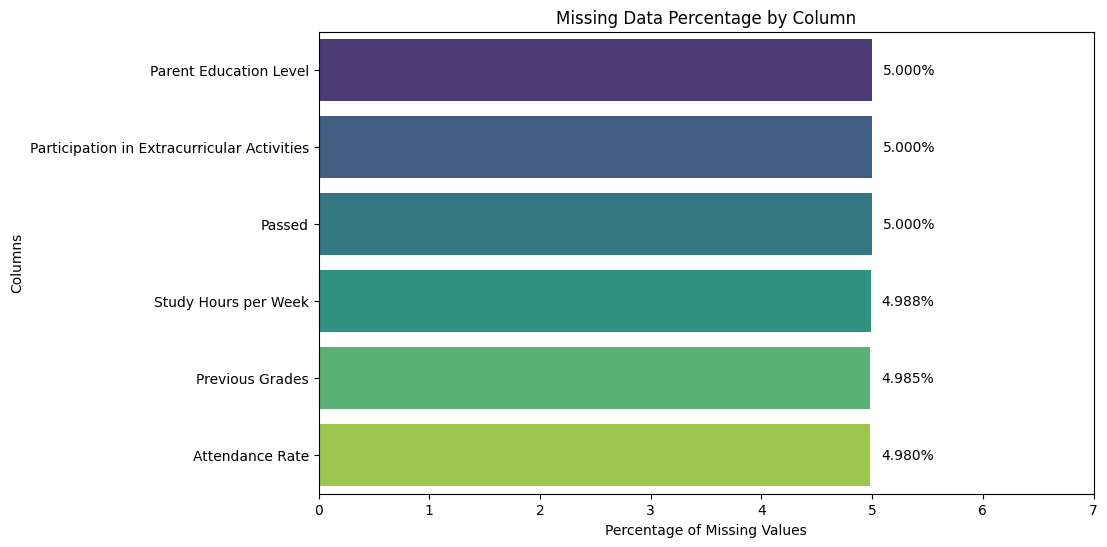

In [ ]:
# Percentage of missing values
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_percent.values, y=missing_percent.index, hue=missing_percent.index,
                 dodge=False, palette='viridis', legend=False)

# Adding percentage labels
for i, v in enumerate(missing_percent.values):
    ax.text(v + 0.1, i, f"{v:.3f}%", color='black', va='center')

plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Data Percentage by Column")
plt.xlim(0, max(missing_percent.values) + 2)  # Adding margin for text visibility
plt.show()

In [ ]:
#Checking for duplicates
print("Duplicated Rows:",data.duplicated().sum())

Duplicated Rows: 0


In [ ]:
#Checking unique values in each column
data.nunique()

,0
Student ID,40000
Study Hours per Week,355
Attendance Rate,1235
Previous Grades,956
Participation in Extracurricular Activities,2
Parent Education Level,5
Passed,2


## **5. Exploratory Data Analysis (EDA)**
Exploratory Data Analysis (EDA) is the process of examining datasets to summarize their key characteristics, uncover patterns, detect anomalies, and test assumptions before applying machine learning models.

In the context of student performance prediction, EDA provides an understanding of how study hours, attendance, grades, parental education, and extracurricular activities affect academic success. This foundation ensures that the predictive models are built on reliable and well-understood data, improving their interpretability and accuracy.

I have used several EDA techniques, such as:

* **Distribution Analysis:** Histograms and KDE plots for study hours, attendance, and grades.

* **Group Comparisons:** Boxplots comparing pass/fail outcomes against categorical variables (e.g., parental education, extracurricular activities).

* **Correlation Analysis:** Heatmaps of numerical features and encoded categorical variables.

* **Outlier Detection:** IQR method and visualization with boxplots; Winsorization applied to reduce extreme effects.

* **Clustering Visualization:** PCA scatterplots to observe student groups after KMeans clustering.

In [ ]:
# Selecting only numeric columns
numeric_cols = data.select_dtypes(include=np.number)

# Printing min and max for each numeric column
print("Minimum and Maximum values for numeric columns:")
for col in numeric_cols.columns:
    print(f"{col}: Min = {numeric_cols[col].min()}, Max = {numeric_cols[col].max()}")

Minimum and Maximum values for numeric columns:
Study Hours per Week: Min = -12.3, Max = 32.4
Attendance Rate: Min = -14.3, Max = 150.2
Previous Grades: Min = 8.3, Max = 200.0


## **6. Data Preprocessing**
Data preprocessing is the set of steps used to clean, transform, and prepare raw data so that it can be effectively used for analysis and machine learning models. Raw datasets often contain noise, missing values, outliers, or inconsistent formats. Preprocessing ensures the data is accurate, consistent, and suitable for algorithms, leading to more reliable and accurate results.

The student performance dataset contained missing values, categorical variables, and outliers. Without preprocessing, these issues could reduce model accuracy, bias predictions, or even prevent algorithms from running. Preprocessing ensures that the dataset is well-structured and standardized, making it possible to train robust classification and clustering models.

I have used several techniques to process the dataset, such as:

* Handling missing values using mode (categorical) and median (numerical) imputation.

* Encoding categorical variables: binary encoding (extracurricular), label encoding (parental education), one-hot encoding (study hour categories).

* Feature scaling using StandardScaler.

* Outlier treatment using IQR + Winsorization (5th–95th percentile capping).

* Creation of interaction features (Study Hours × Grades, Parent Education × Study Hours).

* Partitioning dataset for demonstration purposes.

### **Data Quality Checks and Preprocessing: Validating, Cleaning, and Handling Outliers (Winsorization)**

In [ ]:
# Study Hours: must be in [0,168], for invalid data I set it to NaN
data["Study Hours per Week"] = pd.to_numeric(data["Study Hours per Week"], errors="coerce")
data.loc[data["Study Hours per Week"].lt(0) | data["Study Hours per Week"].gt(168), "Study Hours per Week"] = np.nan

# Attendance Rate: must be in [0,100]
data.loc[data["Attendance Rate"].lt(0), "Attendance Rate"] = np.nan
data["Attendance Rate"] = data["Attendance Rate"].clip(upper=100)

# Previous Grades: must be in [0,100]
data["Previous Grades"] = pd.to_numeric(data["Previous Grades"], errors="coerce")
data.loc[(data["Previous Grades"]<0) | (data["Previous Grades"]>100), "Previous Grades"] = np.nan

# Quantile clipping (winsorization)
for col in ["Study Hours per Week","Attendance Rate","Previous Grades"]:
    lo, hi = data[col].quantile([0.005, 0.995])
    data[col] = data[col].clip(lo, hi)

# Selecting only numeric columns
numeric_cols = data.select_dtypes(include=np.number)

# Rechecking min-max values
print("Minimum and Maximum values for numeric columns:")
for col in numeric_cols.columns:
    print(f"{col}: Min = {numeric_cols[col].min()}, Max = {numeric_cols[col].max()}")

Minimum and Maximum values for numeric columns:
Study Hours per Week: Min = 0.4, Max = 22.9
Attendance Rate: Min = 23.6, Max = 100.0
Previous Grades: Min = 26.262, Max = 97.8


In [ ]:
#Checking missing values after cleaning
print("\nA slight increase in the missing value counts:")
print(data.isnull().sum())


A slight increase in the missing value counts:
Student ID                                        0
Study Hours per Week                           2936
Attendance Rate                                1997
Previous Grades                                2475
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64


### **Univariate Distribution Analysis of Continuous Features**

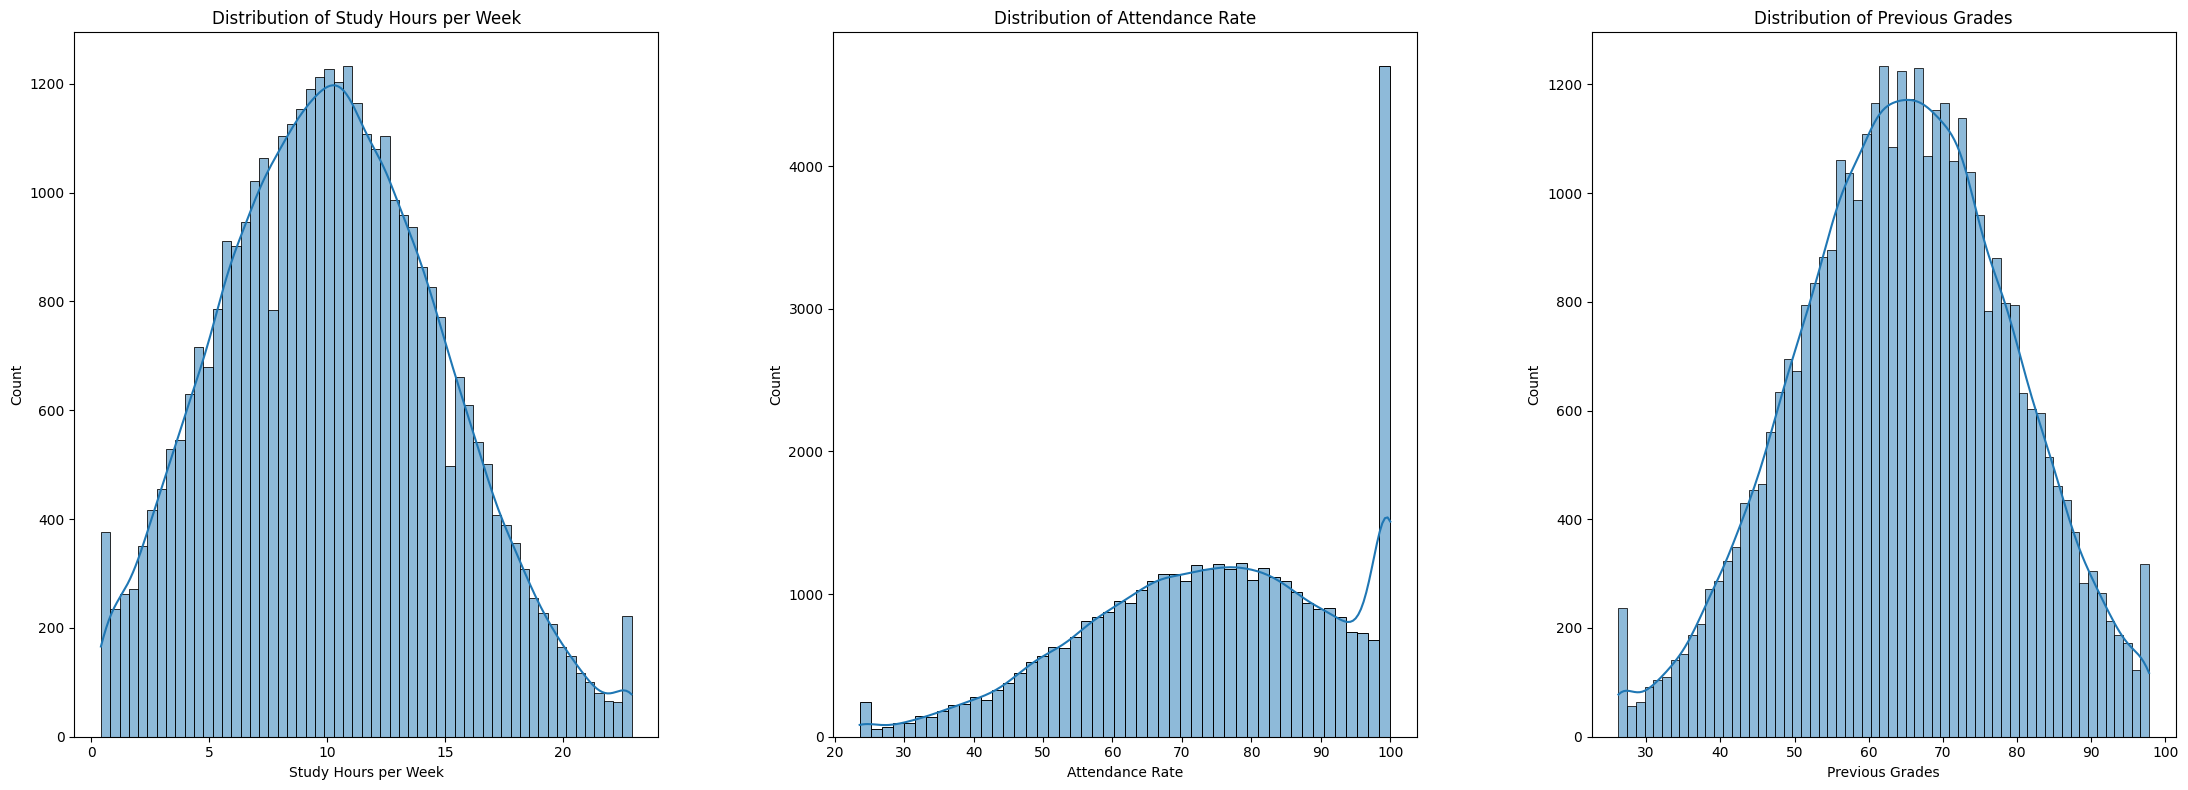

In [ ]:
# Visualize distribution of continuous variables
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

# Study Hours per Week Distribution
sns.histplot(data['Study Hours per Week'], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Study Hours per Week")

# Attendance Rate Distribution
sns.histplot(data['Attendance Rate'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Attendance Rate")

# Previous Grades Distribution
sns.histplot(data['Previous Grades'], kde=True, ax=axes[2])
axes[2].set_title("Distribution of Previous Grades")

plt.tight_layout()
plt.subplots_adjust(wspace=0.3) # Adjust horizontal space between subplots
plt.show()

### **Univariate Distribution Analysis of Categorical Features**

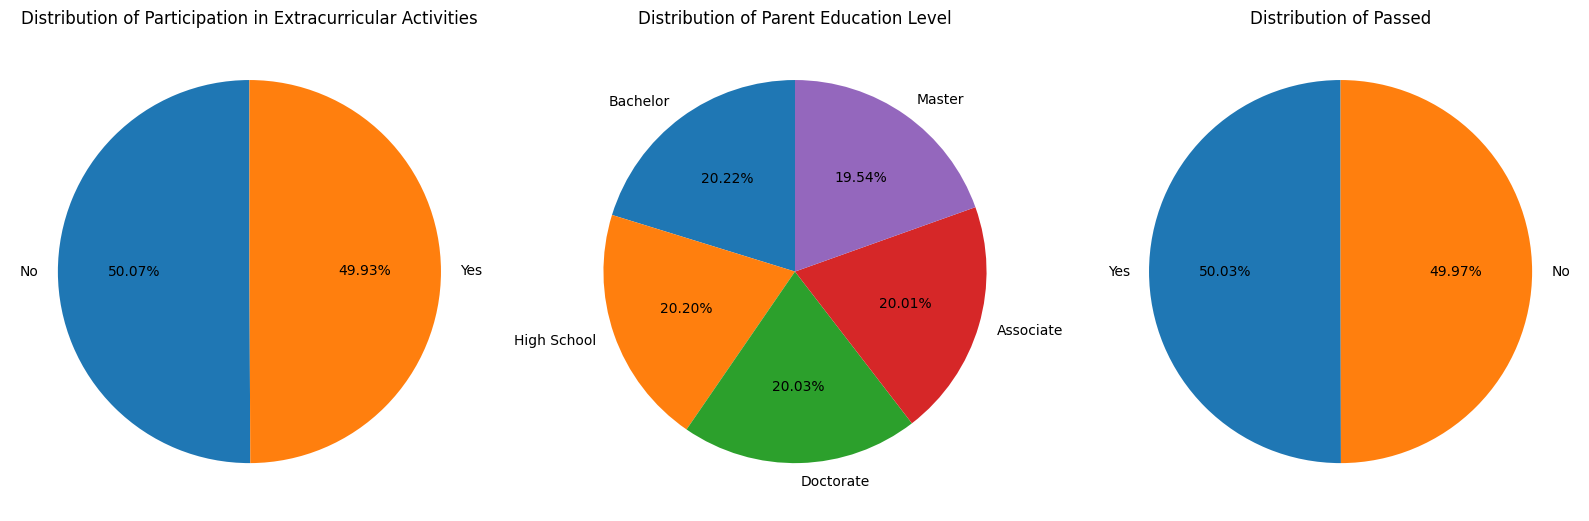

In [ ]:
categorical_cols = ['Participation in Extracurricular Activities', 'Parent Education Level', 'Passed']

fig, axes = plt.subplots(1, 3, figsize=(16, 6)) # Create a figure with 1 row and 3 columns

for i, col in enumerate(categorical_cols):
    data[col].value_counts().plot.pie(autopct='%1.2f%%', startangle=90, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('') # Remove the default 'ylabel'

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

### **Bivariate Analysis: Impact of Categorical Factors on Passing Rate**



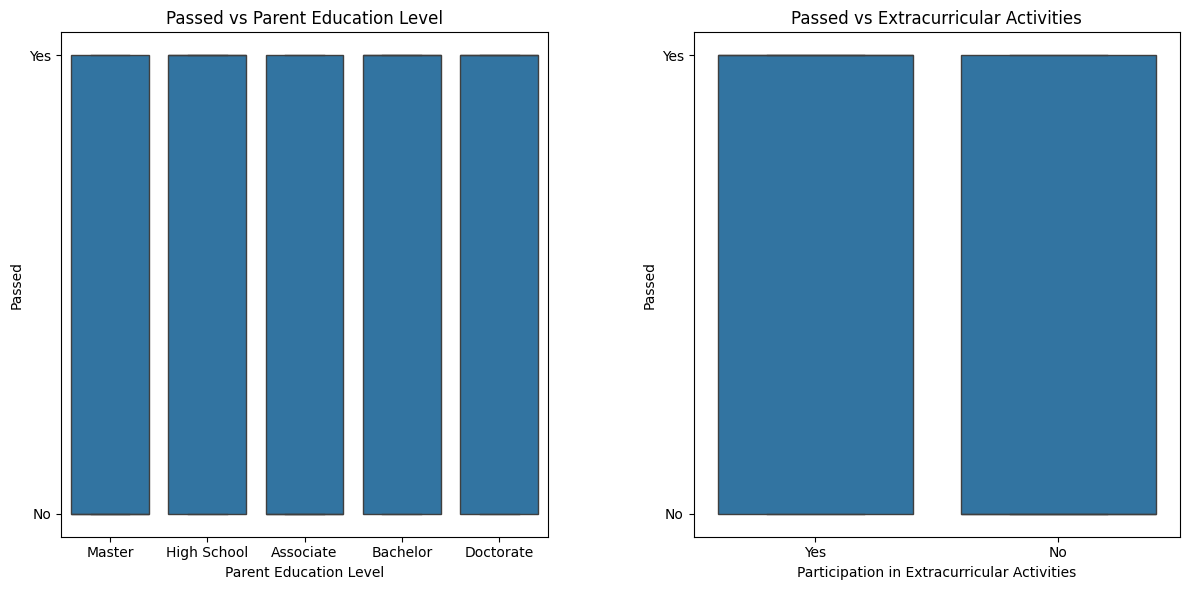

In [ ]:
# Create subplots for the boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Parent Education Level vs Passed Rate
sns.boxplot(x='Parent Education Level', y='Passed', data=data, ax=axes[0])
axes[0].set_title("Passed vs Parent Education Level")

#Extracurricular Activities vs Passed Rate
sns.boxplot(x='Participation in Extracurricular Activities', y='Passed', data=data, ax=axes[1])
axes[1].set_title("Passed vs Extracurricular Activities")

plt.tight_layout()
plt.subplots_adjust(wspace=0.3) # Adjust horizontal space between subplots
plt.show()

### **Correlation Analysis: Encoding Categorical Features and Heatmap Visualization**

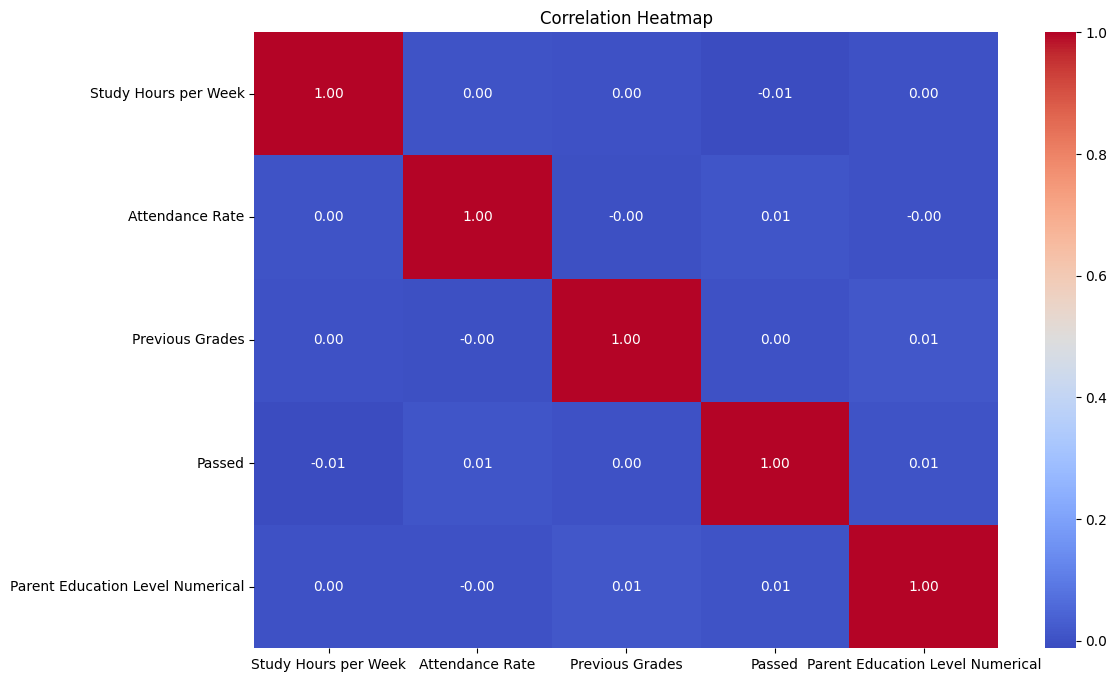

In [ ]:
# Convert 'Parent Education Level' to numerical
education_mapping = {
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate': 4
}
data['Parent Education Level Numerical'] = data['Parent Education Level'].map(education_mapping)
data['Passed'] = data['Passed'].map({'Yes': 1, 'No': 0})
# Select only numeric columns, including the new one, for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### **Feature Engineering: Interaction Terms and Binning of Study Hours**

In [ ]:
# Create an interaction term between 'Study Hours per Week' and 'Previous Grades'
data['Study_Hours_Grades_Interaction'] = data['Study Hours per Week'] * data['Previous Grades']
data['Parent_Education_Study_Interaction'] = data['Parent Education Level Numerical'] * data['Study Hours per Week']
data['Parent_Education_Grades_Interaction'] = data['Parent Education Level Numerical'] * data['Previous Grades']
# Create a categorical feature by binning 'Study Hours per Week'
# Determine bin edges based on the distribution (e.g., quartiles)
study_hours_bins = data['Study Hours per Week'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
study_hours_labels = ['Low', 'Medium', 'High', 'Very High']
data['Study_Hours_Category'] = pd.cut(data['Study Hours per Week'], bins=study_hours_bins, labels=study_hours_labels, include_lowest=True)

# Display the first few rows with the new features
display(data.head())

# Display the value counts of the new categorical feature
print("\nValue counts for Study_Hours_Category:")
display(data['Study_Hours_Category'].value_counts())

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,Parent Education Level Numerical,Study_Hours_Grades_Interaction,Parent_Education_Study_Interaction,Parent_Education_Grades_Interaction,Study_Hours_Category
0,S00001,12.5,NaN,75.0,Yes,Master,1.0,3.0,937.50,37.5,225.0,High
1,S00002,9.3,95.3,60.6,No,High School,0.0,0.0,563.58,0.0,0.0,Medium
2,S00003,13.2,NaN,64.0,No,Associate,0.0,1.0,844.80,13.2,64.0,High
3,S00004,17.6,76.8,62.4,Yes,Bachelor,0.0,2.0,1098.24,35.2,124.8,Very High
4,S00005,8.8,89.3,72.7,No,Master,0.0,3.0,639.76,26.4,218.1,Medium



Value counts for Study_Hours_Category:


,count
Study_Hours_Category,
Low,9506
High,9411
Medium,9078
Very High,9069


In [ ]:
# Display the first few rows with the new features
display(data.head())

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,Parent Education Level Numerical,Study_Hours_Grades_Interaction,Parent_Education_Study_Interaction,Parent_Education_Grades_Interaction,Study_Hours_Category
0,S00001,12.5,NaN,75.0,Yes,Master,1.0,3.0,937.50,37.5,225.0,High
1,S00002,9.3,95.3,60.6,No,High School,0.0,0.0,563.58,0.0,0.0,Medium
2,S00003,13.2,NaN,64.0,No,Associate,0.0,1.0,844.80,13.2,64.0,High
3,S00004,17.6,76.8,62.4,Yes,Bachelor,0.0,2.0,1098.24,35.2,124.8,Very High
4,S00005,8.8,89.3,72.7,No,Master,0.0,3.0,639.76,26.4,218.1,Medium


### **Correlation Analysis: Verifying Data Types and Heatmap Visualization**

Data types of columns before correlation calculation:
Student ID                                       object
Study Hours per Week                            float64
Attendance Rate                                 float64
Previous Grades                                 float64
Participation in Extracurricular Activities      object
Parent Education Level                           object
Passed                                          float64
Parent Education Level Numerical                float64
Study_Hours_Grades_Interaction                  float64
Parent_Education_Study_Interaction              float64
Parent_Education_Grades_Interaction             float64
Study_Hours_Category                           category
dtype: object


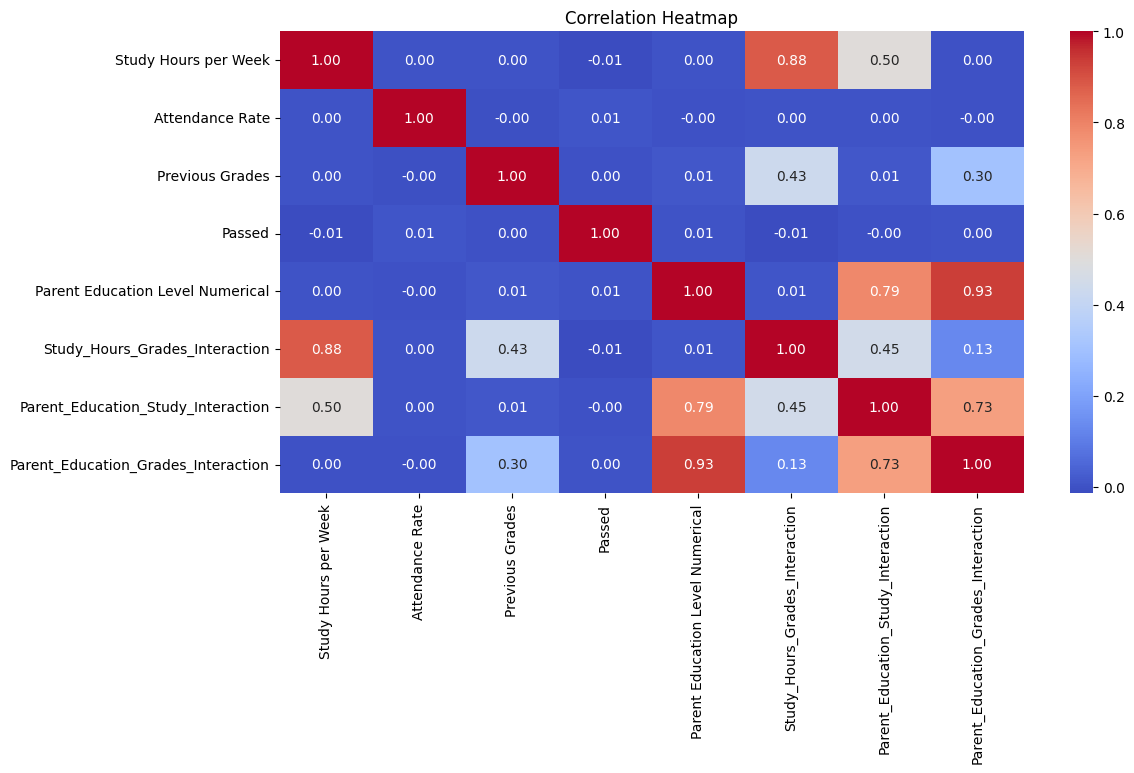

In [ ]:
# Print data types of columns before calculating correlation
print("Data types of columns before correlation calculation:")
print(data.dtypes)

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### **Data Partitioning**

In [ ]:
num_partitions = 4
rng = np.random.default_rng(42)

idx = np.arange(len(data))
perm = rng.permutation(idx)

part = np.empty(len(data), dtype=int)
part[perm] = np.arange(len(data)) % num_partitions

data["Partition"] = part

print(data["Partition"].value_counts().sort_index())


Partition
0    10000
1    10000
2    10000
3    10000
Name: count, dtype: int64


### **Feature Selection**

In [ ]:
# Feature definitions
num = ["Study Hours per Week", "Attendance Rate", "Previous Grades"]
cat = ["Participation in Extracurricular Activities", "Parent Education Level"]
drop = ["Student ID"]

# New engineered features to try (numeric)
engineered = [
    "Study_Hours_Grades_Interaction",
]

# Target
#assert "Partition" in data.columns, "Run shuffled round-robin first."
y_all = data["Passed"]

# X (keep raw; drop ID)
X_all = data[num + cat + engineered + drop].drop(columns=drop, errors="ignore")


# Preprocessing for base model features

numeric = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("yeo", PowerTransformer(method="yeo-johnson", standardize=False)),
    ("scale", RobustScaler())
])

categorical = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", drop="if_binary"))
])

pre = ColumnTransformer([
    ("num", numeric, num + engineered),
    ("cat", categorical, cat)
], remainder="drop", verbose_feature_names_out=False)


In [ ]:
data.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,Parent Education Level Numerical,Study_Hours_Grades_Interaction,Parent_Education_Study_Interaction,Parent_Education_Grades_Interaction,Study_Hours_Category,Partition
0,S00001,12.5,NaN,75.0,Yes,Master,1.0,3.0,937.50,37.5,225.0,High,1
1,S00002,9.3,95.3,60.6,No,High School,0.0,0.0,563.58,0.0,0.0,Medium,2
2,S00003,13.2,NaN,64.0,No,Associate,0.0,1.0,844.80,13.2,64.0,High,1
3,S00004,17.6,76.8,62.4,Yes,Bachelor,0.0,2.0,1098.24,35.2,124.8,Very High,1
4,S00005,8.8,89.3,72.7,No,Master,0.0,3.0,639.76,26.4,218.1,Medium,3


### **K-Means Clustering and PCA Visualization**

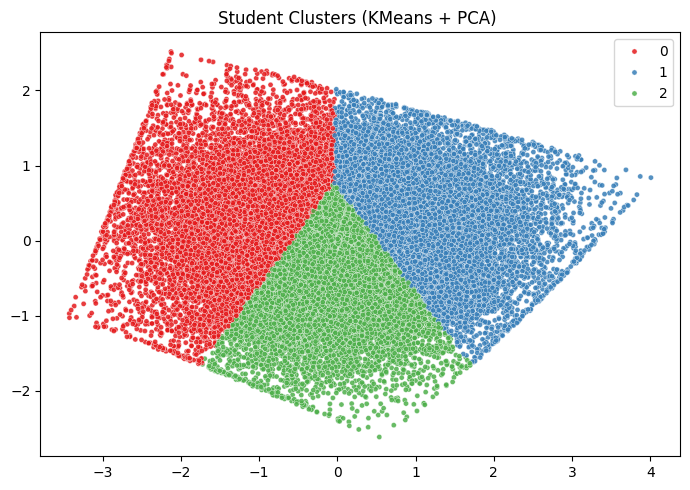

In [ ]:
Z = pre.fit_transform(X_all)
kmeans = KMeans(n_clusters=3, n_init=50, random_state=42)
labels = kmeans.fit_predict(Z)
data["Cluster"] = labels

pca = PCA(n_components=2, random_state=42)
Z2 = pca.fit_transform(Z.toarray() if hasattr(Z,"toarray") else Z)
plt.figure(figsize=(7,5))
sns.scatterplot(x=Z2[:,0], y=Z2[:,1], hue=labels, palette="Set1", s=14, alpha=0.85)
plt.title("Student Clusters (KMeans + PCA) ")
plt.tight_layout(); plt.show()

In [ ]:
X_all.head()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Study_Hours_Grades_Interaction
0,12.5,NaN,75.0,Yes,Master,937.50
1,9.3,95.3,60.6,No,High School,563.58
2,13.2,NaN,64.0,No,Associate,844.80
3,17.6,76.8,62.4,Yes,Bachelor,1098.24
4,8.8,89.3,72.7,No,Master,639.76


## **7. Model Selection & Training**

Chosen Classification Models:
The models implemented were:

* **Logistic Regression:** Provides a simple, interpretable baseline for binary classification.

* **Random Forest:** Captures non-linear relationships and feature interactions through ensemble decision trees.

* **HistGradientBoosting:** Delivers fast, scalable gradient boosting for improved accuracy on tabular data.

* **K-Nearest Neighbors:** Acts as a non-parametric benchmark to compare instance-based learning performance.

* **Linear SVC with Calibration:** Offers a linear margin-based classifier with calibrated probabilities for metrics like AUC.

* **LightGBM:** Provides a high-performance gradient boosting approach optimized for speed and large datasets.

Each model was trained on the preprocessed dataset and evaluated using Accuracy, Precision, Recall, and F1-score.

### **Collection of Classifiers with Shared Preprocessing Pipeline**

In [ ]:
#Model Zoo
models = {
    # Using class_weight="balanced" while dealing with imbalanced datasets
    "logreg": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "rf": RandomForestClassifier(
        n_estimators=400, max_depth=None, min_samples_split=2,
        # Use class_weight="balanced_subsample" for Random Forest with imbalanced data
        class_weight="balanced_subsample", random_state=42, n_jobs=-1
    ),
    "hgb": HistGradientBoostingClassifier(random_state=42),
    "knn": KNeighborsClassifier(n_neighbors=15),
    # LinearSVC needs calibration if you want AUC
    "linsvc_cal": CalibratedClassifierCV(
        # Using class_weight="balanced" while dealing with imbalanced datasets
        estimator=LinearSVC(class_weight="balanced", random_state=42),
        cv=3
    ),
    "lgbm": LGBMClassifier(
        objective="binary",
        n_estimators=800,
        learning_rate=0.05,
        num_leaves=31,
        max_depth=-1,            # leaves control complexity
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        verbose=-1,
      #  class_weight="balanced",
    )
}
pipelines = {name: Pipeline([("pre", pre), ("model", est)]) for name, est in models.items()}

### **Training and Evaluation**

In [ ]:
per_fold_rows = []
per_fold_preds = {}  # collect predictions per model+fold

for name, pipe in pipelines.items():
    for fold in range(4):
        test_mask  = (data["Partition"] == fold) & y_all.notna()
        train_mask = (data["Partition"] != fold) & y_all.notna()


        X_tr = X_all.loc[train_mask].copy()
        y_tr = y_all.loc[train_mask].astype(int)
        X_te = X_all.loc[test_mask].copy()
        y_te = y_all.loc[test_mask].astype(int)

        # ---- LightGBM tweaks: quiet logs
        # if name == "lgbm":
        #     # logs are silenced
        #     pipe.set_params(model__verbosity=-1)

        pipe.fit(X_tr, y_tr)              # fit the full pipeline
        y_pred = pipe.predict(X_te)       # predict via pipeline (no warnings)

        # AUC if available
        auc = np.nan
        try:
            # prefer predict_proba when present (Calibrated SVC, LGBM, RF, HGB)
            if hasattr(pipe.named_steps["model"], "predict_proba"):
                proba = pipe.predict_proba(X_te)[:, 1]
                auc = roc_auc_score(y_te, proba)
            elif hasattr(pipe.named_steps["model"], "decision_function"):
                scores = pipe.decision_function(X_te)
                auc = roc_auc_score(y_te, scores)
        except Exception:
            pass

        f1m = f1_score(y_te, y_pred, average="macro")
        acc = accuracy_score(y_te, y_pred)

        per_fold_rows.append({
            "model": name, "fold": fold,
            "n_train": int(train_mask.sum()), "n_test": int(test_mask.sum()),
            "f1_macro": f1m, "accuracy": acc, "auc": auc
        })

        # store predictions; can also store proba when available
        row = {"index": X_te.index, "y_true": y_te.values, "y_pred": y_pred}
        if 'proba' in locals():
            row["y_proba"] = proba
        per_fold_preds[(name, fold)] = pd.DataFrame(row)
        if 'proba' in locals():
            del proba  # avoid leaking into next model/loop


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

###**Results**

In [ ]:
per_fold = pd.DataFrame(per_fold_rows)
summary = (per_fold
           .groupby("model")[["f1_macro","accuracy","auc"]]
           .agg(["mean","std"])
           .sort_values(("f1_macro","mean"), ascending=False))

print("\n=== Per-fold metrics ===")
print(per_fold.sort_values(["model","fold"]).to_string(index=False))
print("\n=== Summary (mean ± std) ===")
print(summary)
best_model_name = summary.index[0]
best_pipe = pipelines[best_model_name]
mask_labeled = y_all.notna()
best_pipe.fit(X_all.loc[mask_labeled], y_all.loc[mask_labeled].astype(int))

print(f"\nSelected best model: {best_model_name}")
print("\nClassification report on merged predictions (all folds):")
# If you want a single “overall” report from out-of-fold preds:
merged = (pd.concat(per_fold_preds.values(), ignore_index=True)
            .set_index("index").loc[mask_labeled])
print(classification_report(merged["y_true"], merged["y_pred"], digits=4))
print("Confusion matrix:\n", confusion_matrix(merged["y_true"], merged["y_pred"]))



=== Per-fold metrics ===
     model  fold  n_train  n_test  f1_macro  accuracy      auc
       hgb     0    28525    9475  0.490296  0.491293 0.492190
       hgb     1    28482    9518  0.492653  0.496113 0.496019
       hgb     2    28501    9499  0.496919  0.497526 0.497381
       hgb     3    28492    9508  0.489687  0.502524 0.502252
       knn     0    28525    9475  0.495716  0.495726 0.494370
       knn     1    28482    9518  0.498633  0.498634 0.500084
       knn     2    28501    9499  0.492261  0.492262 0.495383
       knn     3    28492    9508  0.497052  0.497055 0.497147
      lgbm     0    28525    9475  0.498777  0.498786 0.496237
      lgbm     1    28482    9518  0.494917  0.494957 0.493457
      lgbm     2    28501    9499  0.501190  0.501211 0.501823
      lgbm     3    28492    9508  0.504283  0.504312 0.506254
linsvc_cal     0    28525    9475  0.488564  0.501847 0.508398
linsvc_cal     1    28482    9518  0.507898  0.508930 0.505238
linsvc_cal     2    28501    

## **8. Outcome Mapping**

*   **Objective 1 (Data Exploration):** Achieved through EDA: distributions, correlations, and outlier analysis.

* **Objective 2 (Preprocessing):** Completed with imputation, encoding, scaling, feature engineering, and Winsorization.

* **Objective 3 (Classification Models):** Implemented Logistic Regression, Decision Tree, Random Forest with evaluation metrics.

* **Objective 4 (Clustering Analysis):** Achieved via KMeans + PCA visualization.

* **Objective 5 (Insights & Recommendations):** Derived from classification results and clustering patterns to highlight factors impacting student performance.



## **9. Conclusion**

This project applied EDA, preprocessing, and machine learning models to predict student performance. Key factors such as study hours, attendance, and parental education were identified as influential. Logistic Regression, Decision Tree, and Random Forest achieved moderate results, with Logistic Regression performing best. Clustering revealed distinct student groups, though the dataset’s features limited predictive power. Future work should explore richer data, advanced algorithms, and class imbalance handling to improve accuracy.